# Lab 1: Warmup

## Environment check

Run the following cell to check that your environment is set up properly.

In [4]:
from fastbook import *
pip_path = !which pip
assert 'conda' in pip_path[0], "pip path should include conda"

On the lab computers, this should display `True`:

In [5]:
torch.cuda.is_available()

True

Anyone running locally on macOS CPU will need this code; generally you should be using the lab machines though:

In [6]:
import sys
if sys.platform == "darwin":
    # https://stackoverflow.com/a/64855500/69707
    import os
    os.environ['OMP_NUM_THREADS'] = '1'

In [7]:
1 + 1

2

## Markdown Formatting

Here is some Markdown formatting:
* This is **bold**
* This is *italic*
* This is a [link to GitHub's markdown page](https://docs.github.com/en/github/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax)

In [8]:
x = 1.0
x * 2
print("Something")
x = x * 2
x * 2

Something


4.0

## Basic Image Classifier

In [9]:
from fastai.vision.all import *

In [10]:
path = untar_data(URLs.PETS)/'images'
path

Path('/scratch/cs344/data/oxford-iiit-pet/images')

In [11]:
def is_cat(x):
    return x[0].isupper()

dls = ImageDataLoaders.from_name_func(
    path, get_image_files_sorted(path),
    valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(224))

In [12]:
learn = cnn_learner(
    dls=dls,
    arch=resnet34,
    metrics=error_rate)
learn.fine_tune(epochs=1)

epoch,train_loss,valid_loss,error_rate,time
0,0.166130,0.016332,0.006089,00:22


epoch,train_loss,valid_loss,error_rate,time
0,0.054310,0.011663,0.004060,00:26


*optional*: uploader widget to try out your own image

In [14]:
from ipywidgets import widgets
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [15]:
if len(uploader.data) > 0:
    img = PILImage.create(uploader.data[0])
    is_cat, _, probs = learn.predict(img)
    print(f"Is this a cat?: {is_cat}.")
    print(f"Probability it's a cat: {probs[1].item():.6f}")

In [16]:
path

Path('/scratch/cs344/data/oxford-iiit-pet/images')

In [17]:
images = get_image_files_sorted(path)
first_img = images[0]
first_img

Path('/scratch/cs344/data/oxford-iiit-pet/images/Abyssinian_1.jpg')

In [18]:
is_cat(first_img.name)

True

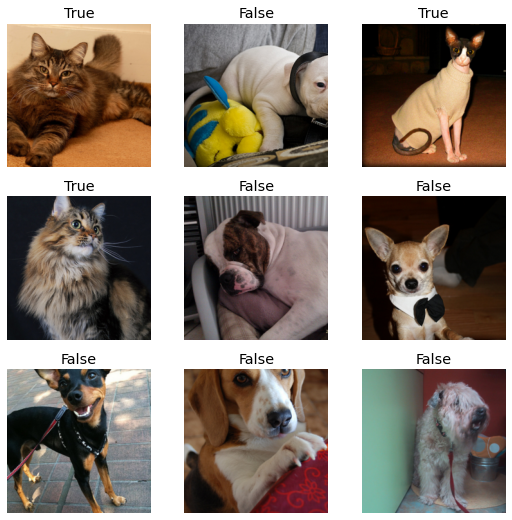

In [19]:
dls.train.show_batch()

1. `Path` is /scratch/cs344/data/oxford-iiit-pet/images and is organized alphabetically and by species.
2. `Images` is a list of paths to an image. The file corresponding to the first image is `Abyssinian_1.jpg` and is a cat.
3. `is_cat` is a function that returns a boolean for whether or not the image is a cat. It does this by checking is the first letter of the image name is uppercase or lowercase.
4. The text over each image indicates if it is a cat, `True` for cat and `False` for dog.

## PyTorch

### Dot products

Recall that we can make a line by an expression like `y = w*x + b`. (Some of you may remember *mx+b* , but we'll use *w* for the *weight(s)* instead.)

That's a multiplication followed by a sum. We can extend that to lots of *x*'s, each of which needs a corresponding *w*:

`y = w1*x1 + w2*x2 + ... + wN*xN + b`

For simplicity, let's start by ignoring the `b`ias.  So we're left with

`y = w1*x1 + w2*x2 + ... + wN*xN`

that is, multiply each number in `w` by its corresponding number in `x` and add up the results: `sum(w[i] * x[i] for i in range(N))`.

The result is called a *dot product*, and is one of the fundamental operations in linear algebra. At this point you don't need to understand all the linear algebra part of this, we're just implementing a common calculation.

Let's do that in Python, and then Torch. To start, let's make a `w`eights and an `x`.

In [20]:
w = tensor([-2.0, 1.0])
w

tensor([-2.,  1.])

In [21]:
x = tensor([1.5, 2.0])
x

tensor([1.5000, 2.0000])

The shapes of `w` and `x` must match.

In [22]:
N = len(w)
assert N == len(x)

#### `for` loop approach

In [24]:
def dot_loop(w, x):
    sum = 0.0
    for i in range(len(w)):
        sum += w[i]*x[i]
    return sum 
dot_loop(w, x)

tensor(-1.)

#### Torch Elementwise Operations

In [25]:
w * x

tensor([-3.,  2.])

In [28]:
w.sum()

tensor(-1.)

In [29]:
def dot_ops(w, x):
    return (w * x).sum()
dot_ops(w, x)

tensor(-1.)

## Linear layer

In [31]:
def linear(weights, bias, x):
    return torch.dot(weights, x) + bias
linear(w, 1.0, x)

tensor(0.)

### Linear layer, Module-style

In [32]:
class Linear:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
        
    def forward(self, x):
        return torch.dot(self.weights, x) + self.bias

layer = Linear(weights=w, bias=1.0)
layer.forward(x)

tensor(0.)

## Mean Squared Error

In [34]:
y_true = tensor([3.14, 1.59, 2.65])
y_pred = tensor([2.71, 8.28, 1.83])

In [39]:
resid = y_true - y_pred
resid

tensor([ 0.4300, -6.6900,  0.8200])

In [40]:
squared_error = resid*resid
squared_error

tensor([ 0.1849, 44.7561,  0.6724])

In [41]:
squared_error.mean()

tensor(15.2045)

In [42]:
torch.mean(squared_error)

tensor(15.2045)

In [44]:
torch.mean((y_true - y_pred)**2)

tensor(15.2045)